In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import pickle

In [3]:
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

# Фиксация random seed (для повторяемости)
np.random.seed(42)

df_prices = pd.read_csv("df_prices.csv", parse_dates=["Date"])
df_prices.set_index("Date", inplace=True)
df_prices.sort_index(inplace=True)

In [5]:
# Расчет лог-доходностей
df_log_returns = np.log(df_prices / df_prices.shift(1)).dropna()

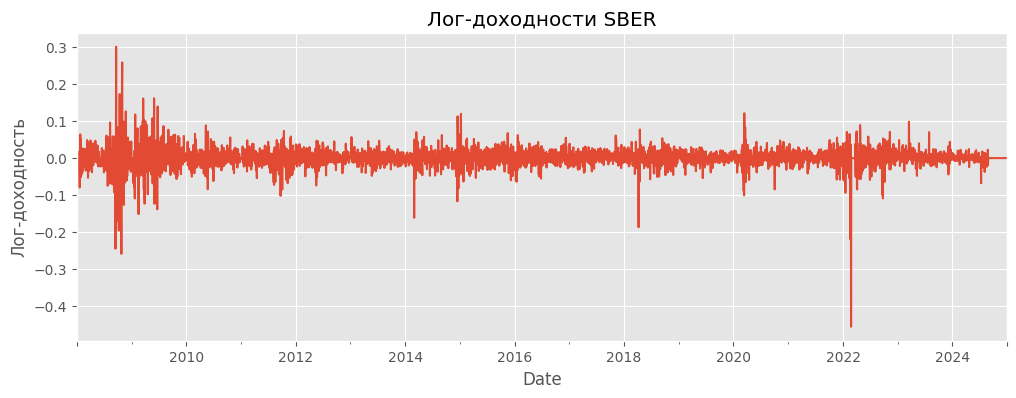

In [6]:
# Лог-доходностей SBER
df_log_returns["SBER"].plot(figsize=(12, 4), title="Лог-доходности SBER")
plt.ylabel("Лог-доходность")
plt.show()

In [7]:
# Сохраняем лог-доходности (на будущее)
df_log_returns.to_csv("df_log_returns.csv")

In [8]:
# Расчет ковариационных матриц по скользящему окну (252 дня)
window = 252  # годовое окно
step = 21     # шаг в 1 месяц (21 торговый день)

rolling_cov_matrices = {}  # словарь: дата -> ков. матрица

for start in range(0, len(df_log_returns) - window + 1, step):
    end = start + window
    date_key = df_log_returns.index[end - 1]
    window_data = df_log_returns.iloc[start:end]
    cov_matrix = window_data.cov()
    rolling_cov_matrices[date_key] = cov_matrix

print(f"Рассчитано ковариационных матриц: {len(rolling_cov_matrices)}")

Рассчитано ковариационных матриц: 200


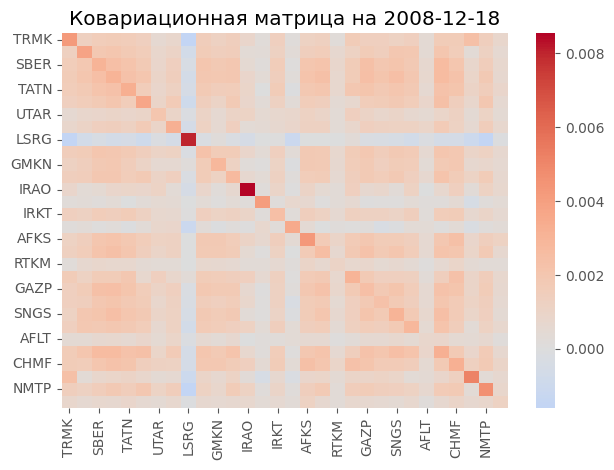

In [9]:
sample_date = list(rolling_cov_matrices.keys())[0]
sns.heatmap(rolling_cov_matrices[sample_date], cmap="coolwarm", center=0)
plt.title(f"Ковариационная матрица на {sample_date.date()}")
plt.tight_layout()
plt.show()

In [12]:
with open("cov_matrices_rolling.pkl", "wb") as f:
    pickle.dump(rolling_cov_matrices, f)

print("Готово: доходности и ковариации рассчитаны и сохранены.")

Готово: доходности и ковариации рассчитаны и сохранены.
